---

[//]: # "Header"

<p style="text-align: left;  font-size:18pt; LINE-HEIGHT:30px;">
    <span style="float: left">
     Technische Hochschule Ingolstadt<br>
     Prof. Dr. Sören Gröttrup<br>
     Laura Dietl
    </span>
    <span style="float: right;">
       Machine Learning 1<br>
        <span style="float: right;">WS 24/25</span>
    </span>
</p>

[//]: # "Header Aufgabenblatt"
<br>
<p style="text-align: center;  font-size:18pt; LINE-HEIGHT:30px;">
     <span style="font-weight: bold;">Aufgabenblatt 5</span><br>
     Themen: ROC<br>
     Abgabetermin: 13.12.2024, 23:59 Uhr <br>
    Punkte: 20
</p>


---

**Namen:** Emelie Hauck, Conrad Christoph

---

# 1. ROC

In [19]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, roc_auc_score

## Aufgabe 1.1 [10 Punkte]
1. Schreiben Sie eine Funktion `calc_roc(y_labels, pred_prob)`, welche die Werte der ROC-Kurve (fpr, tpr , threshold) für ein binäre Klassifikation berechnet und diese zurückgibt. Die Eingaben `y_labels` enthält dabei die wahren Werte eine Zielvariablen und `pred_pob` ist ein Verktor mit Wahrscheinlichkeiten für die Zugehörigkeit des jeweiligen Sample zur positiven Klassen. Beispiele sind unterhalb der Aufgabe angegeben.
1. Erweitern Sie die Funktion so, dass sie zusätzlich den AUC berechnet und diesen ebenfalls zurückgibt, sprich `roc_values, auc = calc_roc(y_labels, pred_prob)`
1. Plotten Sie die ROC-Kurve für die unten agegebenen Vektoren `y_labels` und `pred_prob` und berechnen Sie die AUC
1. Bei welchen Schwellwert (Threshold) für die Entscheidung ob ein Sample zur Klasse 1 gehört ist die Accuracy am größten?

_Hinweis:_ 
* Für die Aufgabe dürfen Sie nicht die von Python (sklearn) bereitgestellten Funktionen für die Berechnung des roc und auc verwenden, sondern sollen diese selbständig entwickeln.
* Python stellt die Funktion `sklearn.metrics.roc_curve` zur Berechnung der tpr und fpr zur Verfügung. Sie können diese Funktion als Kontrolle nutzen, um die Richtigkeit Ihrer Berechnungen zu verifizieren.

In [20]:
y_labels = np.load(file="Daten Blatt 5/target.npy")
pred_prob = np.load(file="Daten Blatt 5/pred.npy")

AUC:  0.931000636672326


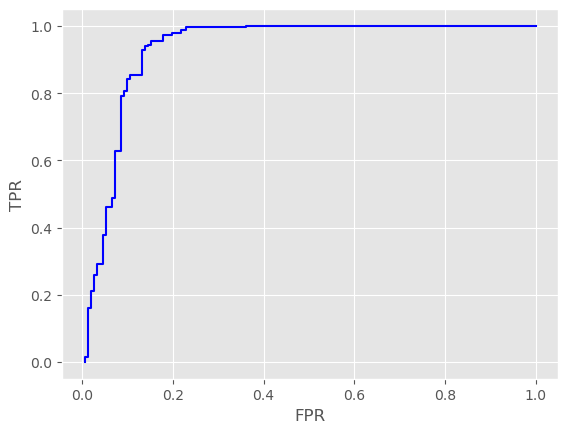

0.2681787091341566


In [21]:
#### Code HERE ####

def cal_roc(y_labels, pred_prob):
    
    thresholds = np.unique(pred_prob)[::-1]
    tprs = []
    fprs = []
    for theta in thresholds:
        pred = (pred_prob >= theta).astype(int)
        
        tp = np.sum((pred == 1) & (y_labels == 1))
        fp = np.sum((pred == 1) & (y_labels == 0))
        tn = np.sum((pred == 0) & (y_labels == 0))
        fn = np.sum((pred == 0) & (y_labels == 1))
    
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

        tprs.append(tpr)
        fprs.append(fpr)
    
    #control_fprs, control_tprs, control_thresholds = roc_curve(y_labels, pred_prob)
    #print(...)

    tprs = np.array(tprs)
    fprs = np.array(fprs)
    thresholds = np.array(thresholds)

    auc = np.trapz(tprs, fprs)
    #auc_control = roc_auc_score(y_labels, pred_prob)
    #print(auc_control)
    return (tprs, fprs, thresholds), auc


roc_val, auc = cal_roc(y_labels, pred_prob)
print("AUC: ",auc)

plt.plot(roc_val[1], roc_val[0], 'b-', label='Liste 1')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# größte Accuracy bei ACC == TPR
pos = np.count_nonzero(y_labels == 1)/len(y_labels)
neg = np.count_nonzero(y_labels == 0)/len(y_labels)

acc = roc_val[0]*pos + (1-roc_val[1])*neg

best_accuracy_index = np.argmax(acc)

best_accuracy = acc[best_accuracy_index]
best_threshold = roc_val[2][best_accuracy_index]

print(best_threshold)

## Aufgabe 1.2 [10 Punkte]

**Daten:** Der Datensatz `creditcard_small.csv` ist ein gekürzter Datensatz mit weniger Variablen von dem Original-Datensatz https://www.kaggle.com/mlg-ulb/creditcardfraud. Er enthält anonymisierte Informationen von Kreditkartentransaktionen und ein Label `Class`, ob diese Transaktion betrügerisch war (`Class=1`), oder nicht (`Class=2`).

1. Trainieren Sie das Logistisches-Regrassionsmodell `log_reg = LogisticRegression()` (siehe Code unten) auf den Trainingsdaten `x_train, y_train` und machen Sie damit eine Vorhersage für die Testdaten `x_test`.
1. Berechnen Sie diverse Evaluationsmetriken für de Performance des Modells auf den Testdaten mittels einen Klassifikations-Report durch die Funktion `classification_report` aus dem Modul `sklearn.metrics`. Was ist die Accuracy, Precision, Sensitivity, Specificity und F1-Score für das Modell?
1. Berechnen Sie die AUC und plotten Sie die ROC-Kurve für die Testdaten. Interpretieren Sie dessen Verlauf. Sie können hier die Funktionen `sklearn.metrics.roc_curve` und `sklearn.metrics.roc_auc_score` benutzen.
1. Trainieren Sie das Neuronale Netz `nn = MLPClassifier(activation="relu")` auf den Trainigsdaten `x_train, y_train`. Wie ist die AUC bei diesem Modell auf den Testdaten? Plotten Sie auch hier die ROC-Kurve und vergleichen Sie diese mit der der Logistischen Regression.

**Vorgeschriebener Code. Bitte nicht verändern**

In [22]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')

In [23]:
#load data
data = pd.read_csv("Daten Blatt 5/creditcard_small.csv")
data

,V5,V6,V7,V8,V27,V28,Class
0,-0.338321,0.462388,0.239599,0.098698,0.133558,-0.021053,0
1,0.060018,-0.082361,-0.078803,0.085102,-0.008983,0.014724,0
2,-0.503198,1.800499,0.791461,0.247676,-0.055353,-0.059752,0
3,-0.010309,1.247203,0.237609,0.377436,0.062723,0.061458,0
4,-0.407193,0.095921,0.592941,-0.270533,0.219422,0.215153,0
...,...,...,...,...,...,...,...
284802,-5.364473,-2.606837,-4.918215,7.305334,0.943651,0.823731,0
284803,0.868229,1.058415,0.024330,0.294869,0.068472,-0.053527,0
284804,2.630515,3.031260,-0.296827,0.708417,0.004455,-0.026561,0
284805,-0.377961,0.623708,-0.686180,0.679145,0.108821,0.104533,0


In [24]:
#Split into train and test
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.3, random_state=1)

In [25]:
y_train = data_train.Class
x_train = data_train.drop(columns=["Class"])

y_test = data_test.Class
x_test = data_test.drop(columns=["Class"])

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
log_reg = LogisticRegression()
nn = MLPClassifier(activation="relu")

**Ihren Code ab hier einfügen**

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.66      0.16      0.25       135

    accuracy                           1.00     85443
   macro avg       0.83      0.58      0.63     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy:  0.998537036386831
Precision:  0.65625
Sensitivity:  0.15555555555555556
Specificity:  0.9998710554695925
F1:  0.25149700598802394
AUC Log Reg 0.839033636722013
AUC NN 0.9320342497512282


<function matplotlib.pyplot.show(close=None, block=None)>

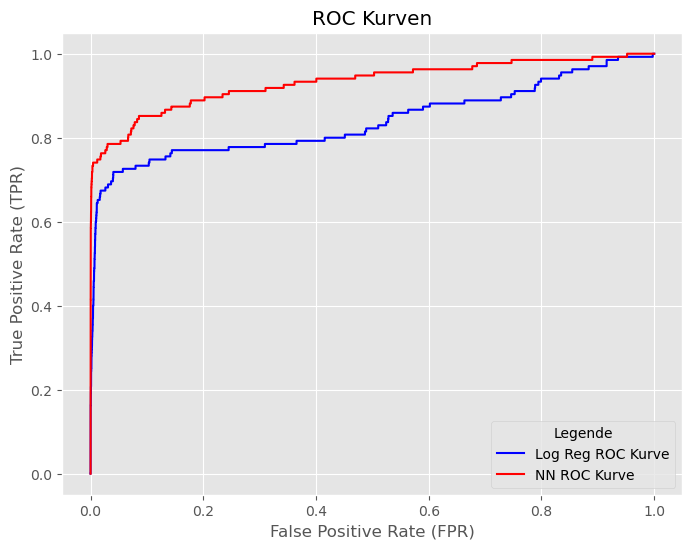

In [28]:
#### CODE HERE ####
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 1.2.1

log_reg.fit(x_train,y_train)

y_pred = log_reg.predict(x_test)

# 1.2.2

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)  
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)
print("F1: ", f1)

# 1.2.3

y_probs = log_reg.predict_proba(x_test)[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc = roc_auc_score(y_test, y_probs)
print("AUC Log Reg", auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red',label="Log Reg ROC Kurve")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Kurven')


# 1.2.4

nn.fit(x_train, y_train)

y_probs_nn = nn.predict_proba(x_test)[:, 1] 

fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_probs_nn)

auc_nn = roc_auc_score(y_test, y_probs_nn)
print("AUC NN", auc_nn)

plt.plot(fpr_nn, tpr_nn, color='blue',label="NN ROC Kurve")
plt.legend(title='Legende', loc='lower right')
plt.show
